# Laboratório 3
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: O Algoritmo dos K Vizinhos Mais Próximos
No Laboratório 1, utilizamos um modelo de Aprendizado de Máquina (AM) como exemplo, o K-Nearest Neighbors (KNN). O KNN funciona ao ensinar o modelo uma amostra dos dados, que aprende a posição de cada elemento em um espaço multidimensional, de forma que quando receber um dado novo, ele atribui a classe correspondente à classe majoritária entre os *k* elementos mais próximos deste no espaço multidimensional, sendo então um modelo baseado em distâncias.

Vamos entender como o KNN funciona na prática no laboratório de hoje!

## Preparando os dados
Antes de mais nada, precisamos configurar nosso ambiente e importar a base de dados que vamos utilizar, que neste exemplo será a Wine, disponibilizada pelo scikit-lear. Nosso objetivo será utilizar os atributos de cada vinho para prever sua classe, entre as possíveis ``class_0``, ``class_1`` e ``class_2``, que fazem referência ao tipo de uva utilizado no vinho. Para isso, podemos separar os dados em um DataFrame ``X`` de atributos e uma Series ``y`` de classes, de forma que usaremos ``X`` para prever ``y``.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

In [3]:
display(X)
display(y)
display(X.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Como o KNN aprende uma amostra dos dados para prever dados novos, precisamos separar os dados entre os que ensinaremos para o modelo e os que usaremos para conferir se está funcionando. Para isso, separamos a base em dados de **treino** e dados de **teste**. Essa é uma prática muito comum em algoritmos de AM, utilizada para verificar que o modelo realmente está cumprindo seu propósito. Note que para isso, não podemos dar nenhuma informação (ou spoiler) sobre os dados de teste para o modelo, então vamos realizar essa separação antes mesmo das outras técnicas de pré-processamento.
A função ``train_test_split`` do scikit-learn faz essa separação automaticamente, apenas é preciso fornecer uma porcentagem (no nosso caso, usaremos 30% dos dados para teste e 70% para treino) e uma semente de aleatorização, se quisermos que os dados sejam separados da mesma forma se executarmos a função novamente. O parâmetro ``stratify`` define que a divisão mantenha a proporção dos dados com base no valor informado, garantindo que uma classe não esteja mais presente do que deveria na base de treinamento do que outra, sendo especialmente relevante em bases desbalanceadas.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
display(X_train.shape)
display(X_test.shape)

(124, 13)

(54, 13)

Prosseguindo com o pré-processamento, como é uma base mais didática, não devemos esperar dados ausentes, duplicados ou inconsistentes, mas sinta-se livre para verificar por si só.

Porém, ainda precisamos normalizar os dados. Como o KNN é baseado em distâncias, ele é fortemente afetado por dados com escalas diferentes. Por exemplo, o atributo ``nonflavanoid_phenols`` varia de 0.13 a 0.66, enquanto o ``magnesium`` varia de 70 a 162, tendo um impacto muito maior no cálculo da distância. Se fosse o caso, também precisaríamos transformar valores categóricos em numéricos, para que pudessem ser contabilizados adequadamente para as distâncias.

Para evitar a contaminação dos dados de teste com os dados de treinamento, definiremos a normalização apenas com os dados de treino, mas aplicaremos em ambas as bases. Na prática, estamos realizando a equação ``(valor - (média da base de treino)) / (desvio padrão da base de treino)``, para cada ``valor`` da base de treino e teste. Dessa vez, utilizaremos a função ``StandardScaler``. 

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit_transform aprende as medidas para normalização e aplica a transformação
X_test = scaler.transform(X_test) # transform aplica a transformação aprendida

## Treinando e testando o modelo

O scikit-learn já possui o modelo do KNN para classificação implementado, o ``KNeighborsClassifier``. Para usá-lo, precisamos definir um modelo que o utiliza e seus parâmetros, no caso, o valor de *k*, definido por ``n_neighbors``. Então, podemos treinar o modelo nos dados de treino com a função ``fit`` e realizar a previsão para os dados de teste com a função ``predict``.

Vamos também calcular a acurácia, ou seja, a porcentagem de acertos da base de teste, e algumas outras métricas, para ver quão bem nosso modelo executou.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
display(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

'Acurácia: 0.94'

              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.86      0.92        21
     class_2       0.88      1.00      0.94        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



Tivemos uma acurácia de 94%, o que já é um bom resultado, mesmo que tenha alguns erros!

Como a base tem 13 dimensões, não podemos visualizar a classificação no espaço multidiminsional como fizemos no primeiro laboratório, mas ainda podemos visualizar a matriz de confusão.

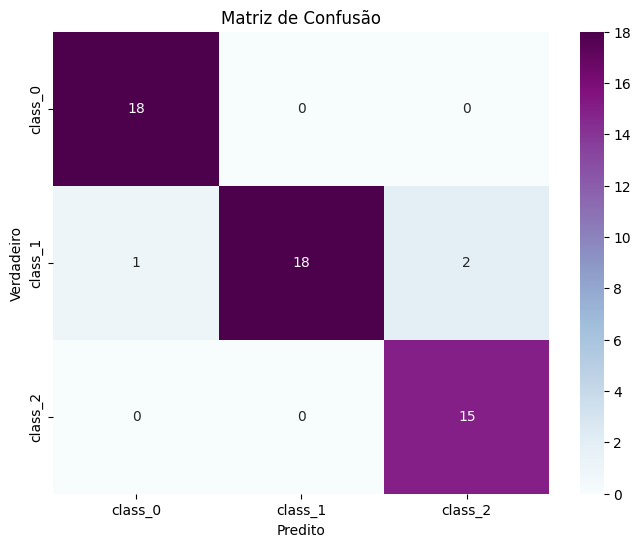

In [7]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="BuPu",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

# Exemplo 2: Redução de Dimensionalidade
No modelo do Exemplo 1, utilizamos todos os 13 atributos da base de dados para realizar a previsão, e obtemos um resultado relativamente bom, mas e se estivessemos lidando com uma base de 30 atributos, como a de cancer de mama? Ou uma de 100 atributos? O modelo estaria calculando a distância em todas essas dimensões, o que afeta o tempo de processamento para problemas com grande volume de dados, e também pode confundir o modelo, afinal, nem toda informação é útil para a classificação.

Esse problema de Aprendizado de Máquina é comumente chamado de Maldição da Dimensionalidade. Ao passo que aumentamos a quantidade de informações que ensinamos ao modelo, mais complexo ele se torna, mais dados podem ser necessários para que ele aprenda e mais chances de estarmos inserindo informações irrelevantes para ele aprender. No Laboratório 2, uma das etapas de pré-processamento foi justamente eliminar atributos desenecessários, mas nem sempre saberemos quais atributos são necessários ou não apenas pelo nosso conhecimento. No exemplo, a não ser que seja um especialista em vinhos, ou faça uma pesquisa mais aprofundada, não deve saber quais atributos são ou não relevantes para a previsão. E, em alguns casos, podemos nem mesmo saber quais são os atributos que estamos trabalhando!

Para isso, podemos aplicar técnicas de Redução de Dimensionalidade! Que podem ser divididas em duas grandes abordagens, técnicas de Seleção de Atributos (Feature Selection) e técnicas de Agregação.

## Seleção de Atributos
Uma das formas de reduzir a dimensionalidade de uma base é selecionando quais atributos devem ser utilizados. Podemos fazer isso de forma manual, como mostrado nos últimos laboratórios, ou utilizar técnicas automáticas para isso.

Uma técnica que apoia a decisão manual, é verificar a correlação dos atributos. Atributos com uma correlação muito alta tornam-se redundantes e podem ser representados apenas por um deles. Como os atributos ``total_phenols`` e ``flavanoids``, que possuem uma correlação de 0.86, mas não temos certeza de sua interação sem consultar um especialista.

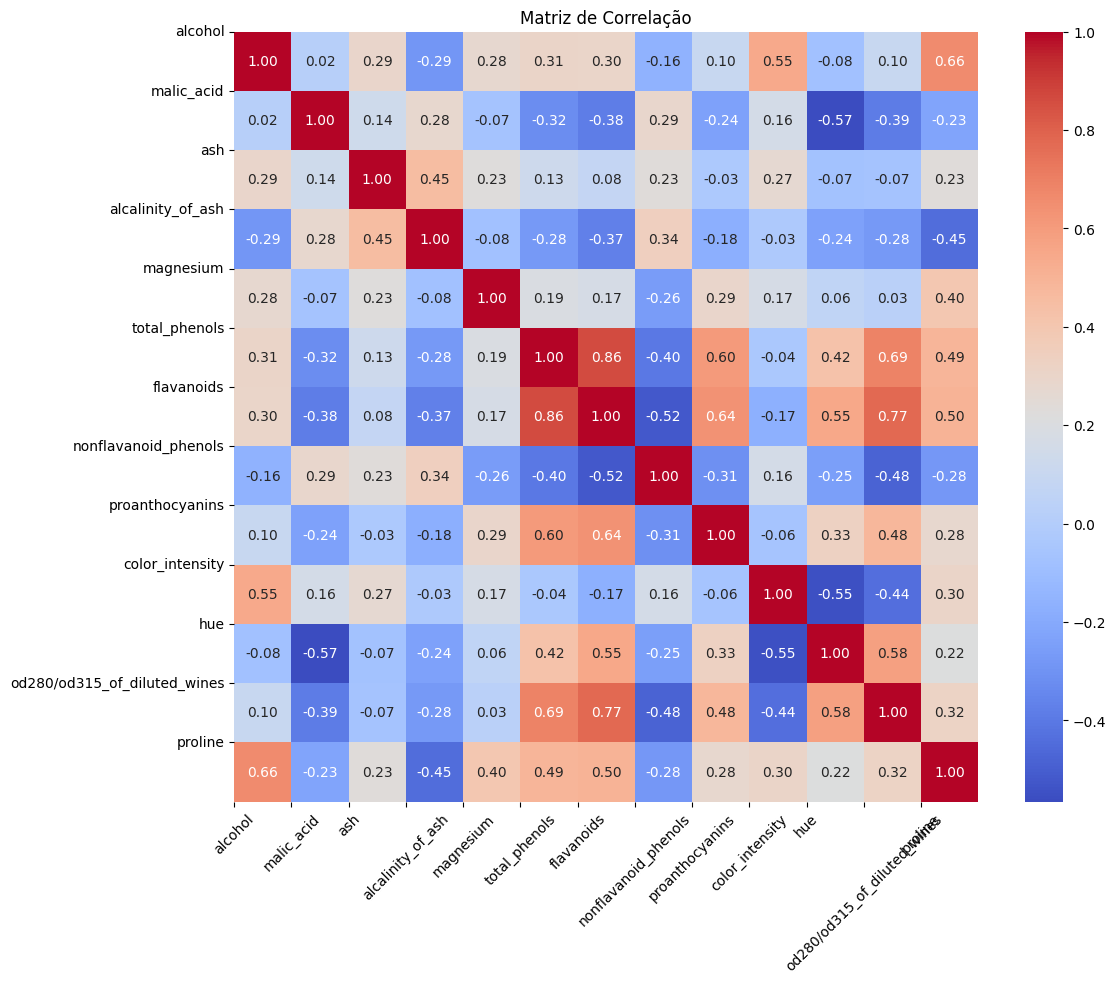

In [18]:
corr_matrix = pd.DataFrame(X_train).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
# Add labels
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns, rotation=0)
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns, rotation=45)
plt.title("Matriz de Correlação")
plt.show()

### Baseada em Filtro
Essa seleção manual que fizemos se enquadraria como um método baseado em filtro. Esse tipo de seleção utilizam métricas estatísticas, como correlação, para aplicar um filtro sobre os dados, independente do modelo de AM que será utilizado.

Um exemplo desse tipo de método é a função ``SelectKBest`` do scikit-learn. Aqui temos uma demonstração de como utilizá-la com a função ``f_classif``, que calcula o ANOVA F-value entre cada atributo e classe. O valor do ANOVA F-value indica quanto o atributo consegue separar as classes, baseado na variância. Usaremos a função para selecionar os 5 melhores atributos.

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5) # seleciona os 5 melhores atributos
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)    # aplica a transformação aprendida
print("Melhores atributos:", selector.get_feature_names_out(wine.feature_names))

Melhores atributos: ['alcohol' 'flavanoids' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']


### Baseada em Wrapper
Outro método, mas um pouco mais lento, é o baseado em wrapper. Esse tipo de seleção utiliza o próprio modelo como parâmetro de seleção, procurando os atributos que apresentam melhores resultados.

Um exemplo é o ``SequentialFeatureSelector``, que realiza uma busca gulosa com diversos subconjuntos de atributos, encontrando a composição de melhor resultado com a quantidade de atributos especificada.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(
    knn,
    n_features_to_select=5,
    direction='forward',    # ou 'backward'
    scoring='accuracy',
    n_jobs=-1
)

sfs.fit(X_train, y_train)
X_selected = sfs.transform(X_train)
print("Atributos selecionados:", sfs.get_feature_names_out(wine.feature_names))

Atributos selecionados: ['alcohol' 'alcalinity_of_ash' 'total_phenols' 'flavanoids' 'hue']


### Embutida
Já métodos embutidos realizam a seleção durante o treinamento do modelo, com base nos atributos utilizados pelo mesmo. O KNN tradicional não possui um método de seleção embutido, mas outros modelos como a Árvore de Decisão fazem esse tipo de seleção. Como exemplo, veja como fazer a seleção de atributos através do método ``DelectFromModel`` em uma Árvore de Decisão. 

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(DecisionTreeClassifier(random_state=0), threshold='median')
X_train_sel = sel.fit_transform(X_train, y_train)

print("Atributos selecionados:", sel.get_feature_names_out(wine.feature_names))



Atributos selecionados: ['ash' 'magnesium' 'flavanoids' 'color_intensity' 'hue'
 'od280/od315_of_diluted_wines' 'proline']


## Agregação
Além da Seleção de Atributos, existem técnicas de Agregação, que substituem os atributos originais por atributos formados de combinações de grupos de atributos. Um exemplo manual de agregação seria, se tivermos o ponto incial e final de um trajeto, e substituímos ambos os valores pela diferença entre eles, a distância percorrida, reduzindo a dimensionalidade sem remover a informação (considerando que apenas a distância era relevante, e não os pontos).

Mas, com dados em que não conhecemos relações, ou com grande volume de atributos, também podemos utilizar técnicas automáticas para transformar esses dados. O uso de Agregação ainda possui uma desvantagem em comparação com a Seleção de Atributos, que é a interpretabilidade dos modelos, visto que não sabemos mais quais atributos estão sendo utilizados ou são mais relevantes para o problema.

### PCA
Uma das técnicas mais conhecidas é a Análise de Componentes Principais, ou Principal Component Analysis (PCA). A PCA correlaciona estatisticamente os exemplos, reduzindo a dimensionalidade pela eliminação de redundâncias.

Podemos utilizar o PCA disponibilizado no scikit-learn para gerar os componentes que melhor representam os dados. E, para verificar quantos devemos usar, podemos visualizar quanta variância dos dados cada componente consegue representar, sendo os valores ideias os que representam de 80 a 90% da variância. 

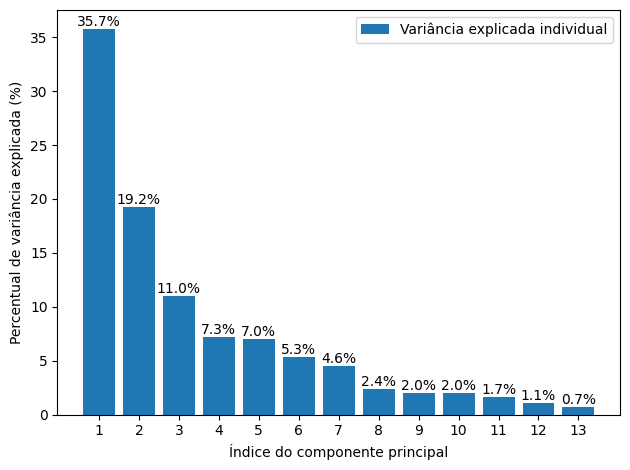

In [31]:
# calcular matriz de covariância, autovalores e autovetores
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

exp_var = []

# Ordenar os autovalores em ordem decrescente
eigen_vals = np.sort(eigen_vals)[::-1]

for i in eigen_vals:
    var = (i / np.sum(eigen_vals)) * 100
    exp_var.append(var)

bar = plt.bar(range(1, 14), exp_var, align='center',
        label='Variância explicada individual')

# Adicionando rótulos de dados no topo das barras
for i, bar in enumerate(bar):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{exp_var[i]:.1f}%', 
             ha='center', va='bottom')

plt.ylabel('Percentual de variância explicada (%)')
plt.xlabel('Índice do componente principal')
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc='best')
plt.tight_layout()


In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Filtrando para 2 componentes principais
principalComponents = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
display(pca_df.head())

,principal component 1,principal component 2
0,-2.184531,-0.790119
1,-2.562591,-1.318656
2,-1.399967,-0.789392
3,-2.760675,-1.515304
4,-0.746032,1.404435


### t-SNE
Outra técnica é a Incorporação Estocástica de Vizinhos com Distribuição t (t-SNE), que aplica transformações matemáticas além do escopo deste trabalho para reduzir a dimensionalidade dos dados.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
tsne_df = pd.DataFrame(data = X_train_tsne, columns = ['t-SNE component 1', 't-SNE component 2'])
display(tsne_df.head())

,t-SNE component 1,t-SNE component 2
0,6.530356,2.145319
1,8.535073,0.668826
2,6.390010,0.374328
3,8.030831,1.663665
4,1.148360,-0.011717


# Exemplo 1.1: KNN com dimensionalidade reduzida
Agora que conhecemos as técnicas de Redução de Dimensionalidade, podemos aplicá-las em nosso problema! Como exemplo, vamos aplicar o PCA, reduzindo os 13 atributos para 2 componentes principais, no KNN anterior e verificar o resultado.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [35]:
X_train_pca = pca_df
X_test_pca = pca.transform(X_test)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
display(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


/home/margotte/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Acurácia: 0.94'

              precision    recall  f1-score   support

     class_0       0.94      0.89      0.91        18
     class_1       0.91      0.95      0.93        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



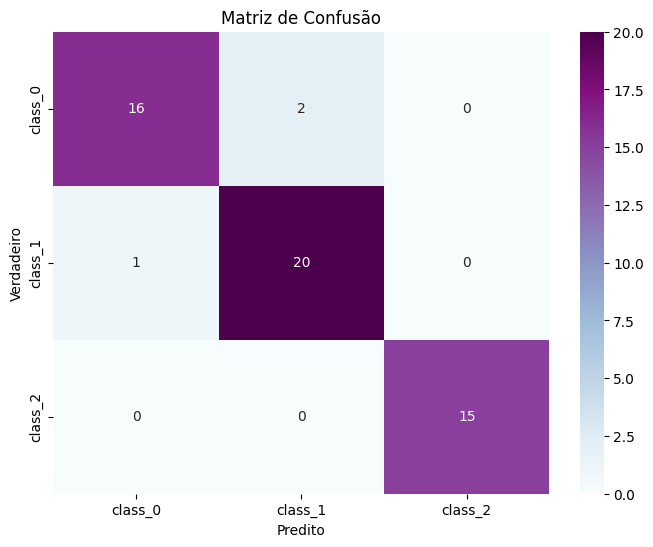

In [10]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="BuPu",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

Tivemos os mesmos 94% de acurácia! O que pode não ter sido uma melhora, mas mostra que conseguimos representar os dados em apenas duas dimensões e obter resultados próximos, potencialmente economizando tempo de processamento e diminuindo a complexidade do modelo.

Além disso, também podemos visualizar os dados em um gráfico bidimensional. Vamos gerar dois gráficos: um para mostrar a distribuição dos dados de treinamento e outro a de testes, indicando a região de classificação aprendida para cada classe!

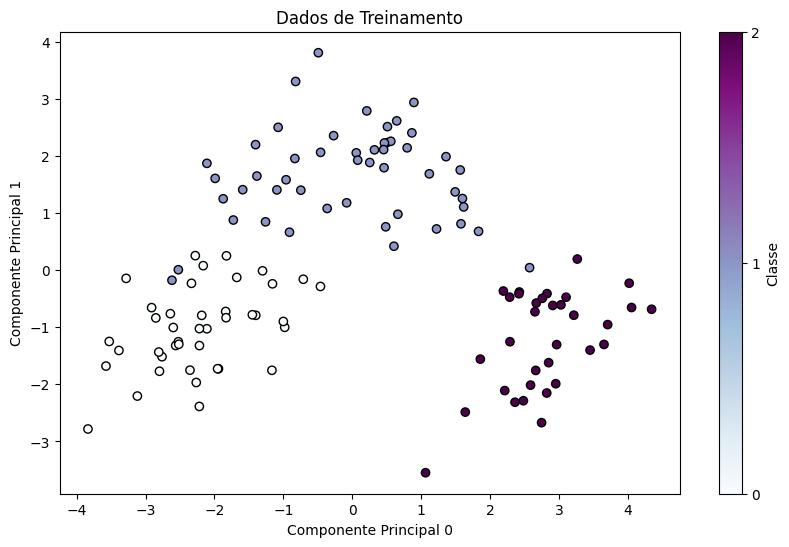

In [36]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], c=y_train, cmap="BuPu", edgecolor="k")
plt.xlabel("Componente Principal 0")
plt.ylabel("Componente Principal 1")
plt.title("Dados de Treinamento")
plt.colorbar(scatter, ticks=range(3), label="Classe")
plt.show()

/home/margotte/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


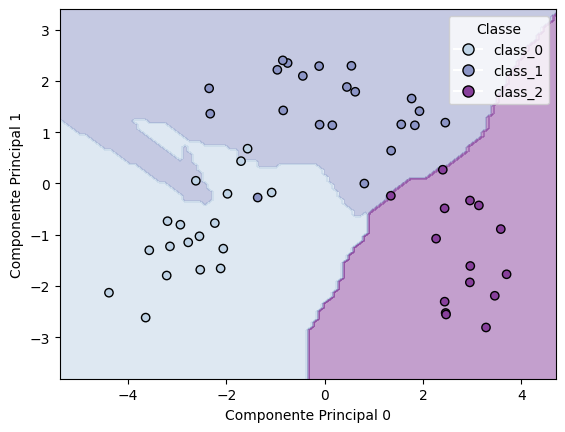

In [37]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Use BuPu palette for 3 classes
colors = sns.color_palette("BuPu", n_colors=3)
cmap = ListedColormap(colors)

disp = DecisionBoundaryDisplay.from_estimator(
    model, X_test_pca, response_method="predict",
    xlabel="Componente Principal 0", ylabel="Componente Principal 1",
    alpha=0.5, cmap=cmap
)
scatter = disp.ax_.scatter(
    X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap, edgecolor="k", label=wine.target_names
)
# Add legend for classes
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls,
                      markerfacecolor=colors[i], markersize=8, markeredgecolor='k')
           for i, cls in enumerate(wine.target_names)]
disp.ax_.legend(handles=handles, title="Classe")
plt.show()

Mas, se utilizassemos um número maior de componentes, o resultado seria o mesmo? Ou se utilizassemos outros métodos de Redução de Dimensionalidade? Teríamos como melhorar o modelo de alguma forma? Bom...

# Exercício!

SUA VEZ!

Vamos colocar essas técnicas em prática!

Suas tarefas são as seguintes:
- Aplique as técnicas diferentes de Redução de Dimensionalidade apresentadas sobre a base de dados Wine (alterando a quantidade de componentes principais no PCA)
- Execute o KNN para cada conjunto de dados gerados, armazenando o valor de acurácia obtido
- Compare os resultados e indique qual técnica foi melhor para o problema
- Repita os experimentos variando o valor de k entre 1, 3 e 5, comparando os resultados

# DESAFIO! (Opcional)

Pegue outra base de dados, ou a base de dados que utilizou no Laboratório 2, realize os pré-processamentos necessários e aplique o KNN para classificar algo. Então, aplique uma das técnicas automáticas de Redução de Dimensionalidade, aplique e compare os resultados!